In [1]:
%matplotlib inline

# this library is for loading data and manipulating it
import pandas as pd

# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# get a helper function for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# get a function for measuring test error
from sklearn.metrics import mean_absolute_error

# for manipulating arrays
import numpy as np

# for visualising data
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.losses import MeanAbsoluteError

In [2]:
#Load
data_train = pd.read_excel("train.xlsx")
data_test = pd.read_excel("test.xlsx")

# Random Forest

Error of Random Forest regression model: 1.6182673639107072


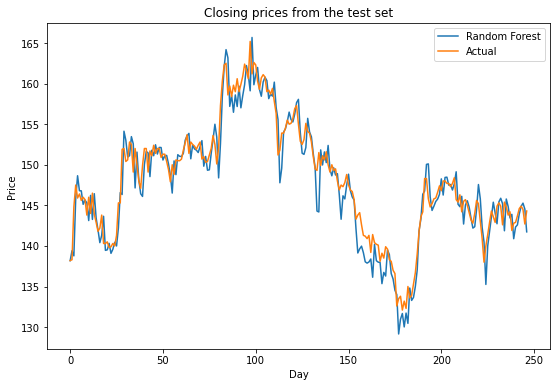

In [4]:
model = RandomForestRegressor()
model.fit(Xdata_Train, Ydata_Train)

# use the model to make predictions on the test set
y_pred = model.predict(Xdata_Test)
y_pred = np.array(data_test['Close'])*(1+y_pred/100)

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "Random Forest"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# KNN

Error of kNN regression model: 1.447347460997314


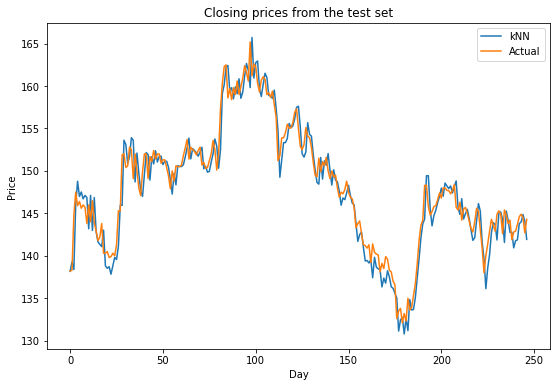

In [5]:
model = KNeighborsRegressor()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)
y_pred = np.array(data_test['Close'])*(1+y_pred/100)

# calculate MAE
model_name = "kNN"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# SVM

Error of SVM regression model: 1.3287780584419138


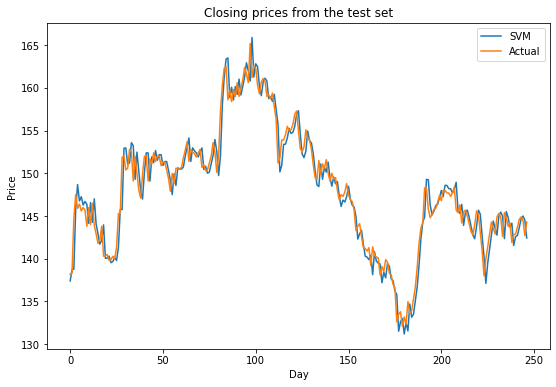

In [6]:
model = SVR()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)
y_pred = np.array(data_test['Close'])*(1+y_pred/100)

# calculate error
model_name = "SVM"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# MLP

Error of MLP regression model: 1.2642461054558822


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


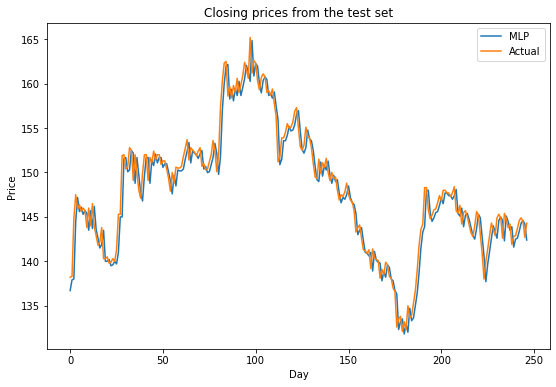

In [7]:
model = MLPRegressor(hidden_layer_sizes=(256,64,32,1),solver='adam')
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)
y_pred = np.array(data_test['Close'])*(1+y_pred/100)

# calculate error
model_name = "MLP"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()